# This file will give us the final data files in the proper grids for the variables we will use in our statistical model. It is intended to be adjusted, to eventually hold all the diff variables we want to see.

## Output: two files to use in our statistical model.
- /d6/bxw2101/model_files/datasets/vars_2x2.nc
- /d6/bxw2101/model_files/datasets/sic_1x0p5.nc

Each file has 2 versions of every data type: the anomaly and the smoothed anomaly

### DATA we will use in our statistical models:
1. SIC, 0.5lat x 1lon
2. SST, 2x2

#### Atmospheric Variables (ERA5):
3. SAT, 2x2
4. 850mbar Height, 2x2
5. 850mbar uwind, 2x2
6. 850mbar vwind, 2x2
7. STHF, 2x2

### (And their smoothed versions)

#### Variables we don't need to use: OHC, SIT (2x2)
### We can combine the 2x2 files into one dataset, with each variable as a dataarray.

## 1. Set up imports, define the smooth_ts() function for smoothing data

In [20]:
def smooth_ts(unsmoothed):
    smoothed = unsmoothed.rolling(tdim=3, center=True).mean()
    smoothed[0] = (unsmoothed[0] + unsmoothed[1]) / 2
    smoothed[-1] = (unsmoothed[-1] + unsmoothed[-2]) / 2
    return smoothed

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import datetime
from dateutil.relativedelta import relativedelta

from cartopy import crs as ccrs, feature as cfeature
import warnings
warnings.filterwarnings('ignore') 

import xarray as xr
import glob, os

from eofs.xarray import Eof
from eofs.standard import Eof as sEof # If needed
from eofs.multivariate.standard import MultivariateEof

sp = ccrs.SouthPolarStereo()
pc = ccrs.PlateCarree()

## 2. SIC Anomaly:

In [22]:
filename = '/d6/bxw2101/combined_netcdf_files/sic_anom_monthly_1x0p5.nc'
sic_anom_ds = xr.open_dataset(filename)
sic_anom_ds = sic_anom_ds.fillna(0)
# save here to netcdf.

In [23]:
sic_1x0p5 = sic_anom_ds.assign(sic_anom_smoothed = smooth_ts(sic_anom_ds.sic_anom))

In [24]:
sic_1x0p5

<xarray.Dataset>
Dimensions:            (tdim: 516, y: 80, x: 360)
Coordinates:
  * y                  (y) float64 -89.5 -89.0 -88.5 -88.0 ... -51.0 -50.5 -50.0
  * x                  (x) float64 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * tdim               (tdim) datetime64[ns] 1979-01-01 ... 2021-12-01
Data variables:
    sic_anom           (tdim, y, x) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    sic_anom_smoothed  (tdim, y, x) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

## 3. All other variables Anomaly:

In [25]:
filename = '/d6/bxw2101/combined_netcdf_files/sst_anom_monthly_2x2.nc'
sst_anom_ds = xr.open_dataset(filename)
sst_anom_ds = sst_anom_ds.rename({'X': 'x', 'Y': 'y'}).fillna(0)

In [26]:
filename = '/d6/bxw2101/combined_netcdf_files/era5_anom_monthly_2x2.nc'
era5_anom_ds = xr.open_dataset(filename)
era5_anom_ds = era5_anom_ds.rename(t2m='sat_anom', z='z_anom', u='u_anom', v='v_anom', sthf = 'sthf_anom')

In [27]:
# Save the variables into two xarray datasets:
vars_2x2 = xr.merge([sst_anom_ds.sst_anom, era5_anom_ds.sat_anom, era5_anom_ds.z_anom, era5_anom_ds.u_anom, era5_anom_ds.v_anom, era5_anom_ds.sthf_anom])

In [28]:
vars_2x2 = vars_2x2.assign(sst_anom_smoothed = smooth_ts(vars_2x2.sst_anom))
vars_2x2 = vars_2x2.assign(sat_anom_smoothed = smooth_ts(vars_2x2.sat_anom))
vars_2x2 = vars_2x2.assign(z_anom_smoothed = smooth_ts(vars_2x2.z_anom))
vars_2x2 = vars_2x2.assign(u_anom_smoothed = smooth_ts(vars_2x2.u_anom))
vars_2x2 = vars_2x2.assign(v_anom_smoothed = smooth_ts(vars_2x2.v_anom))
vars_2x2 = vars_2x2.assign(sthf_anom_smoothed = smooth_ts(vars_2x2.sthf_anom))

In [30]:
vars_2x2 

<xarray.Dataset>
Dimensions:             (x: 180, tdim: 516, y: 20)
Coordinates:
  * x                   (x) float32 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
  * tdim                (tdim) datetime64[ns] 1979-01-01 ... 2021-12-01
  * y                   (y) float32 -88.0 -86.0 -84.0 ... -54.0 -52.0 -50.0
Data variables:
    sst_anom            (tdim, y, x) float32 0.0 0.0 0.0 ... 0.3901 0.367 0.3588
    sat_anom            (tdim, y, x) float32 -1.552 -1.522 ... 0.8713 0.6738
    z_anom              (tdim, y, x) float32 -13.98 -13.97 ... 62.69 62.09
    u_anom              (tdim, y, x) float32 -0.2399 -0.2346 ... -0.2301
    v_anom              (tdim, y, x) float32 -0.08629 -0.07944 ... 0.3763 0.4821
    sthf_anom           (tdim, y, x) float32 4.037e+04 3.844e+04 ... 1.266e+05
    sst_anom_smoothed   (tdim, y, x) float32 0.0 0.0 0.0 ... 0.3438 0.3475
    sat_anom_smoothed   (tdim, y, x) float32 -0.2218 -0.1937 ... 0.4095 0.3168
    z_anom_smoothed     (tdim, y, x) float32 -13.58 -13.55 ... 55.81 54.08
    u_anom_smoothed     (tdim, y, x) float32 -0.2366 -0.2492 ... -1.778 -1.855
    v_anom_smoothed     (tdim, y, x) float32 0.1505 0.1473 ... 1.153 1.157
    sthf_anom_smoothed  (tdim, y, x) float32 9.681e+04 9.35e+04 ... -5.124e+05

## Testing to make sure smoothed files are properly smoothed and they work! (It seems like they do. YAY!)

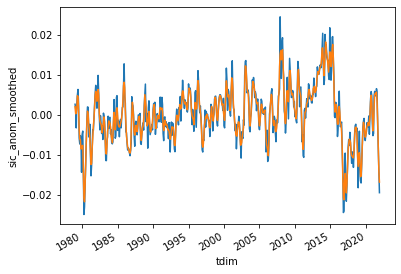

In [32]:
sic_1x0p5.sic_anom.mean(dim=['x', 'y']).plot()
sic_1x0p5.sic_anom_smoothed.mean(dim=['x', 'y']).plot()

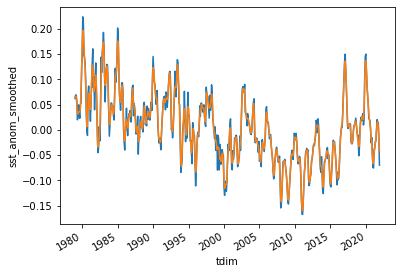

In [34]:
vars_2x2.sst_anom.mean(dim=['x', 'y']).plot()
vars_2x2.sst_anom_smoothed.mean(dim=['x', 'y']).plot()

## 4. Save the two files to NetCDF:

In [35]:
vars_2x2.to_netcdf('/d6/bxw2101/model_files/datasets/vars_2x2.nc', mode='w',format='NETCDF4')
sic_1x0p5.to_netcdf('/d6/bxw2101/model_files/datasets/sic_1x0p5.nc', mode='w',format='NETCDF4')